 # Práctica de aprendizaje automático (parte 2)

Entrega este cuaderno habiendo **ejecutado todas las celdas**. Incluye en la entrega **todos los ficheros necesarios para su ejecución**.

Asegúrate de que la presentación está bien estructurada: Se valorará la **claridad, concisión, y completitud** del informe.

Se trata de una práctica abierta: **sé intrépido y explora**. 

1. Describe las características de los datos:
    * Tipo de datos (e.g. [https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data)](https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data)))
    * Número de ejemplos de cada una de las clases.
    * Número y tipo (nominales no ordenados, nominales ordenados, numéricos) de atributos.

Esta información se debería utilizar en el análisis; por ejemplo, si se selecciona un atributo para la predicción, ¿es clara su relevancia por el tipo de información que proporciona de acuerdo con nuestro conocimiento experto sobre el área?
    
2. Detalla la metodología utilizada:
    * Partición de los datos: tamaño de los conjuntos de entrenamiento y test, uso de estratificación en el muestreo.
    * Preprocesamiento: codificación de los atributos, construcción y selección de características, normalización, etc. (¡solo se debe utilizar la información del conjunto de entrenamiento!)
    * Determinación de los hiperparámetros; por ejemplo, mediante búsqueda en rejilla y validación cruzada.
    * Estimación del error de generalización y su incertidumbre.
2. Resume los resultados en gráficas y tablas.
3. Elabora esta información e ilustra tus observaciones con los resultados obtenidos.
4. Proporciona una recomendación final:
    * Tipo de clasificador.
    * Configuración del clasificador (arquitectura, hiperparámetros, etc.) y método de entrenamiento (función de coste, método de optimización, uso de técnicas de regularización,...)
    * Para el predictor final, proporciona los errores de entrenamiento, validación cruzada y test.
5. Resume las conclusiones del análisis.

## 2. Construcción de un clasificador en una base de datos real (4.5 puntos)

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

%matplotlib inline

In [19]:
df = pd.read_csv('./data/german_credit_data.csv', sep=';')
# Source: https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data)
# This dataset classifies people described by a set of attributes as good or bad credit risks. Comes in two formats (one all numeric). Also comes with a cost matrix

print(df.shape)
df.head(5)

(1000, 21)


,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,...,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [20]:
class_label = 'default'
feature_names = list(df.columns)
feature_names.remove(class_label)
print(feature_names)
X = df[feature_names].values
y = df[class_label].values

['account_check_status ', 'duration_in_month ', 'credit_history ', 'purpose ', 'credit_amount ', 'savings ', 'present_emp_since ', 'installment_as_income_perc ', 'personal_status_sex ', 'other_debtors ', 'present_res_since ', 'property ', 'age ', 'other_installment_plans ', 'housing ', 'credits_this_bank ', 'job ', 'people_under_maintenance ', 'telephone ', 'foreign_worker']


**Estadísticos básicos de cada atributo:**

In [21]:
df.describe()

,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.300000,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,0.458487,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,0.000000,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,0.000000,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,0.000000,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,1.000000,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,1.000000,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


**Datos codificados de forma numérica**

In [22]:
df = pd.read_csv('./data/german_credit_data_numeric.csv', sep=';')
class_label = 'Class'
feature_names = list(df.columns)
feature_names.remove(class_label)
print(feature_names)
X = df[feature_names].values
y = df[class_label].values

['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23']


**Histogramas suavizados de cada atributo en cada clase. El color indica la clase ("default"/"no default"):**

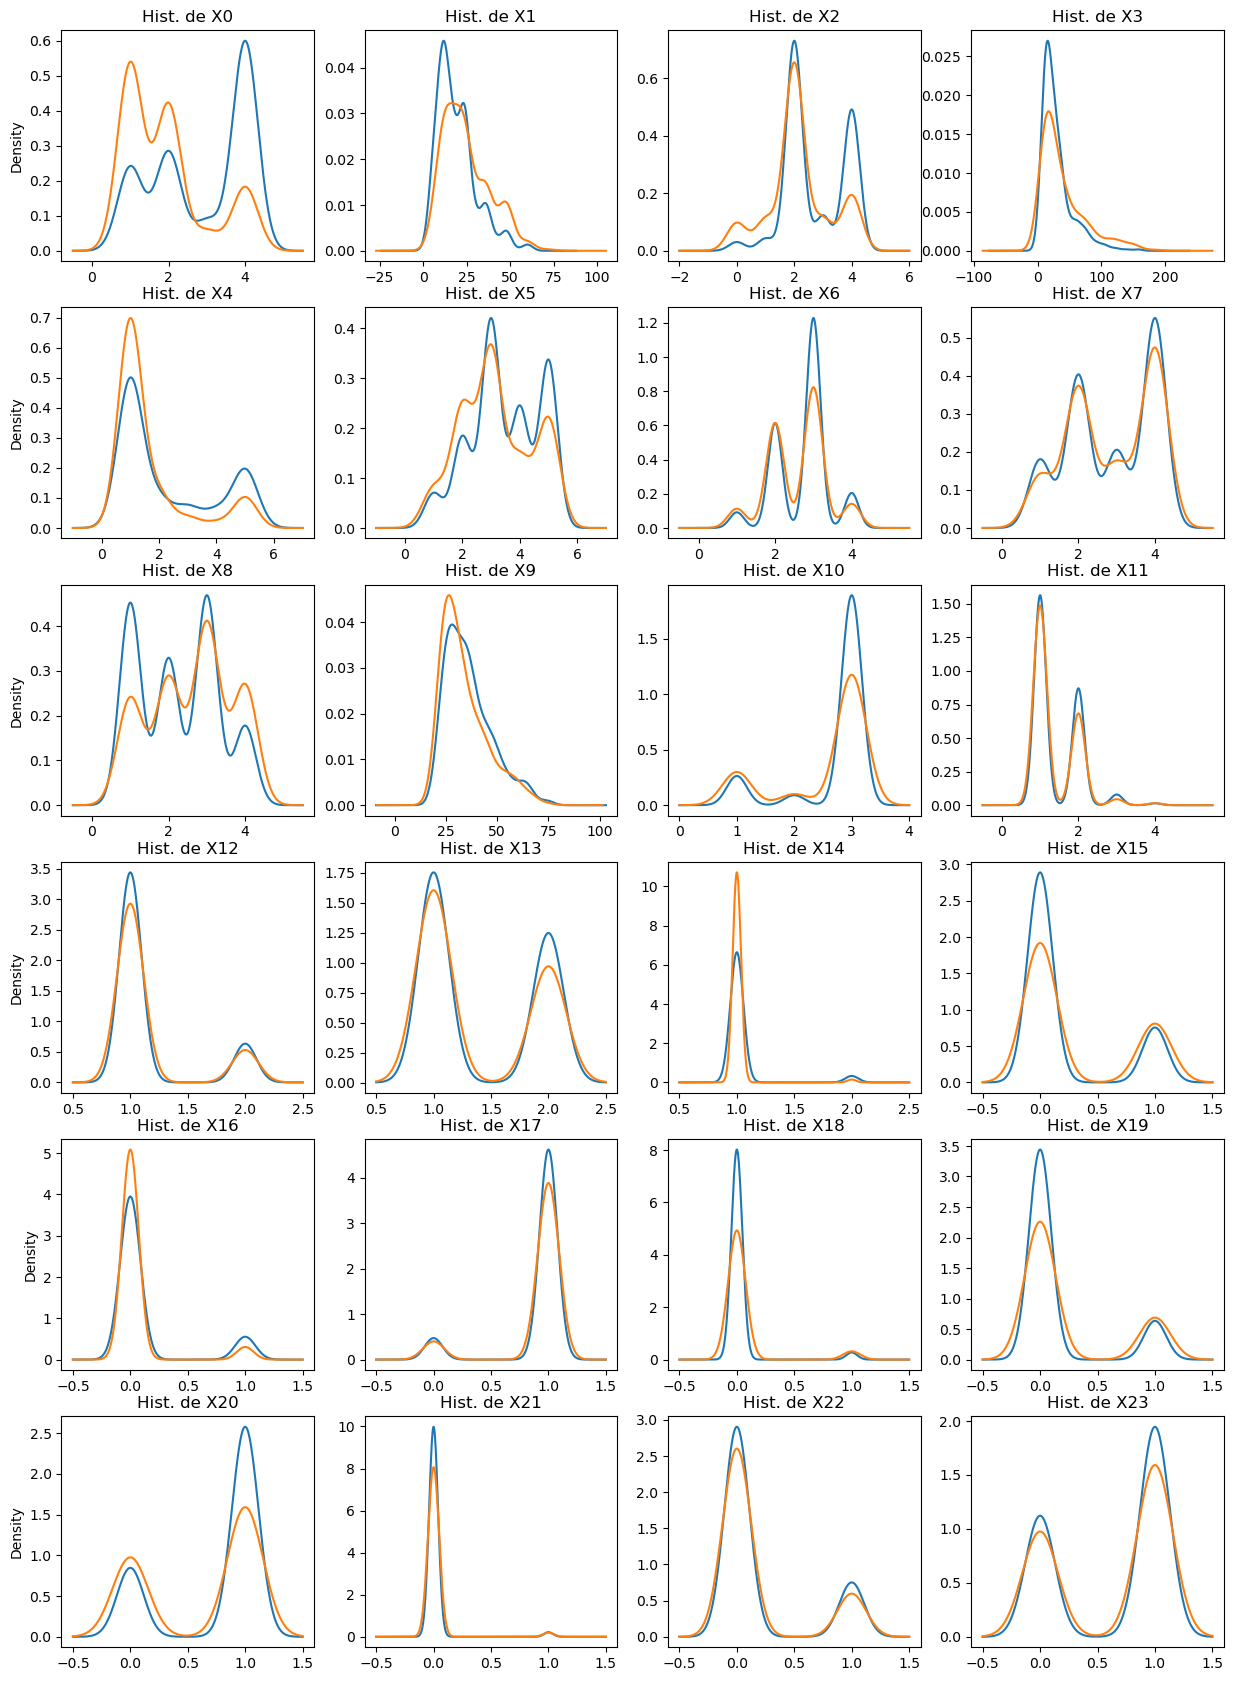

In [9]:
plt.figure(figsize=(15, 21))
n_cols_plot = 4
n_rows_plot = int(len(feature_names) / n_cols_plot)
for i,n in enumerate(feature_names):
    plt.subplot(n_rows_plot, n_cols_plot, i+1)
    aux = 'Density' if i%n_cols_plot == 0 else ''
    df.groupby('Class')[n].plot(kind='kde', title='Hist. de '+n)
    plt.ylabel(aux)

## Entrenamiento de un modelo y chequeo de su calidad usando 5-fold cross validation

La siguiente celda entrena un modelo y lo evalúa en varias particiones training-test diferentes de los datos. El resultado es un score medio junto a su desviación estándar. El tipo de modelo (Naïve Bayes / árbol de decisión / knn/ regresión logística / red neuronal) y parámetros empleados deberán ser seleccionados para que dicho resultado sea el mejor posible.

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
# otros clasificadores (del notebook p4_01)

clf = KNeighborsClassifier(n_neighbors=1) # DecisionTreeClassifier(max_depth=3)
scores = cross_val_score(clf, X, y, cv=10) # 10-fold cross-validation
print('Precisión en cada una de las particiones: ', scores)
print('Estimación de la precisión por validación cruzada: {:.2f} +/- {:.2f}'.format(scores.mean(), scores.std()))

Precisión en cada una de las particiones:  [0.67 0.64 0.72 0.66 0.64 0.71 0.6  0.71 0.62 0.66]
Estimación de la precisión por validación cruzada: 0.66 +/- 0.04


## Responde aquí a las siguientes preguntas:

* Haz una gráfica que muestre la dependencia de la precisión de un clasificador de vecinos próximos con el número de vecinos. Si es más conveniente, utiliza gráficas en escala logarítmica para alguno de los ejes (`semilogx`, `semilogy`, `loglog`).
* Utilizando los conceptos de sub- y sobreajuste:
    * Comenta los resultados cuando el número de vecinos es pequeño.
    * Comenta los resultados cuando el número de vecinos es grande.
    * Explica el significado del valor de la precisión cuando el número de vecinos toma el valor mayor posible.
* ¿Cuál es la mejor precisión que se alcanza con k-nn y para qué k (valor de `n_neighbours`)?
* ¿Cuál es la mejor precisión que se alcanza con un árbol de decisión y con qué profundidad máxima (valor de `max_depth`)? Para ello, haz una gráfica que muestre la dependencia de la precisión con la profundidad máxima del árbol. Comenta los resultados.
* ¿Cuál es la mejor precisión que se alcanza con una red neuronal con una sola capa oculta y con qué configuración (valor de `hidden_layer_sizes`)? Para ello, haz una gráfica que muestre la dependencia de la precisión con el número de nodos en la capa oculta. Comenta los resultados.
* ¿Cuál es la mejor precisión que se alcanza con una red neuronal con varias capas ocultas y con qué configuración? Para ello, haz una gráfica que muestre la dependencia de la precisión con el número de capas ocultas, suponiendo constante el número de nodos en cada capa oculta. Comenta los resultados.
* Resume los resultados y conclusiones del estudio realizado.

**Además de gráficas, puede ser conveniente presentar los resultados en forma de tablas.**


Óptimo número de vecinos (K): 15 con precision: 0.712


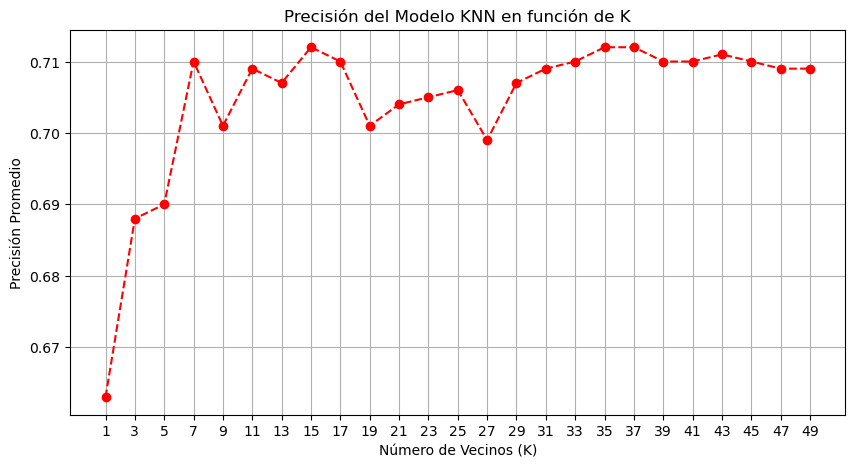

In [31]:
# Importaciones necesarias
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

df = pd.read_csv('./data/german_credit_data_numeric.csv', sep=';')
class_label = 'Class'
feature_names = list(df.columns)
feature_names.remove(class_label)
X = df[feature_names].values
y = df[class_label].values

# Búsqueda del mejor valor de K
k_values = range(1, 50, 2)
accuracy_scores = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10)
    accuracy_scores.append(scores.mean())

best_k = k_values[accuracy_scores.index(max(accuracy_scores))]
print(f"Óptimo número de vecinos (K): {best_k} con precision: {max(accuracy_scores)}")

# Visualización de precisión para diferentes valores de K
plt.figure(figsize=(10, 5))
plt.plot(k_values, accuracy_scores, marker='o', linestyle='--', color='red')
plt.title('Precisión del Modelo KNN en función de K')
plt.xlabel('Número de Vecinos (K)')
plt.ylabel('Precisión Promedio')
plt.xticks(k_values)
plt.grid()
plt.show()


Mejor precisión alcanzada: 0.728 con profundidad máxima: 3


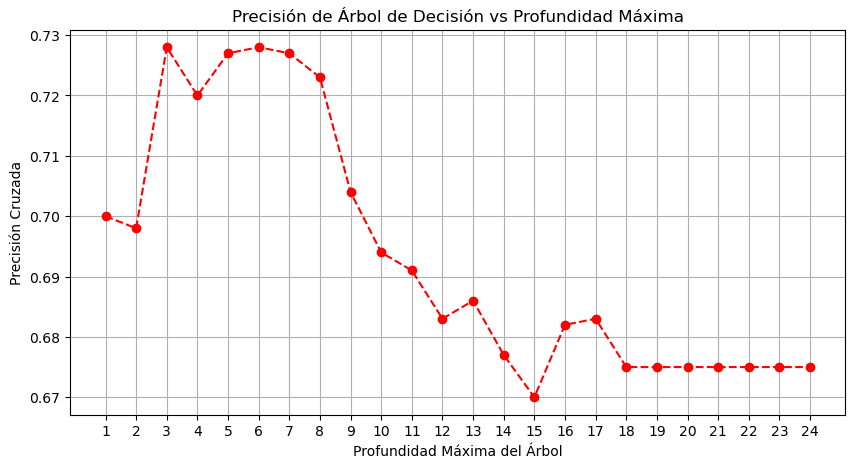

In [33]:
# Importaciones necesarias
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

df = pd.read_csv('./data/german_credit_data_numeric.csv', sep=';')
class_label = 'Class'
feature_names = list(df.columns)
feature_names.remove(class_label)
X = df[feature_names].values
y = df[class_label].values

# Búsqueda de la mejor profundidad del árbol
max_depth_values = range(1, 25)  
accuracy_scores = []
for depth in max_depth_values:
    tree_model = DecisionTreeClassifier(max_depth=depth, random_state=10)
    scores = cross_val_score(tree_model, X, y, cv=10)
    accuracy_scores.append(scores.mean())

# Mejor precisión y profundidad correspondiente
best_accuracy = max(accuracy_scores)
best_depth = max_depth_values[accuracy_scores.index(best_accuracy)]
print(f"Mejor precisión alcanzada: {best_accuracy} con profundidad máxima: {best_depth}")

# Gráfico de precisión en función de la profundidad máxima del árbol
plt.figure(figsize=(10, 5))
plt.plot(max_depth_values, accuracy_scores, marker='o', linestyle='--', color='red')
plt.title('Precisión de Árbol de Decisión vs Profundidad Máxima')
plt.xlabel('Profundidad Máxima del Árbol')
plt.ylabel('Precisión Cruzada')
plt.xticks(max_depth_values)
plt.grid()
plt.show()


Mejor precisión alcanzada con red neuronal: 0.7909999999999999 con 31 nodos en la capa oculta


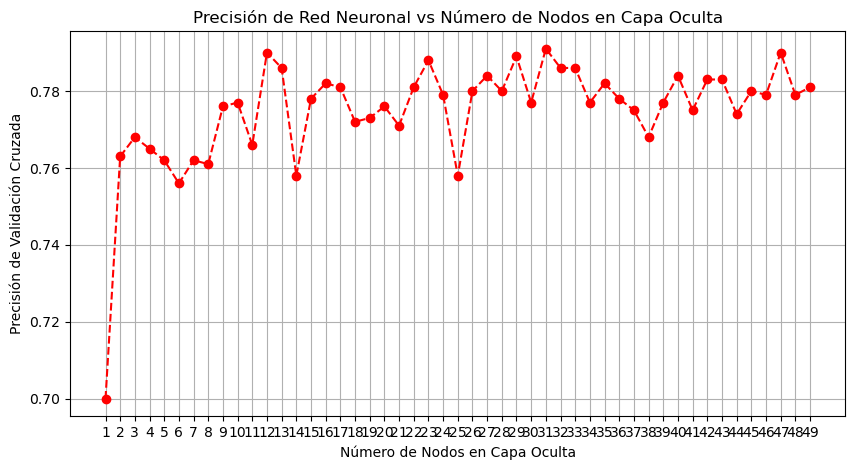

In [35]:
# Importaciones necesarias
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier  
import matplotlib.pyplot as plt

df = pd.read_csv('./data/german_credit_data_numeric.csv', sep=';')
class_label = 'Class'
feature_names = list(df.columns)
feature_names.remove(class_label)
X = df[feature_names].values
y = df[class_label].values

# Búsqueda de la mejor configuración de la capa oculta
hidden_layer_sizes = range(1, 35) 
accuracy_scores = []
for size in hidden_layer_sizes:
    neural_model = MLPClassifier(hidden_layer_sizes=(size,), max_iter=1000, random_state=10) 
    scores = cross_val_score(neural_model, X, y, cv=10)
    accuracy_scores.append(scores.mean())

# Mejor precisión y configuración correspondiente de la capa oculta
best_neural_accuracy = max(accuracy_scores)
best_hidden_layer_size = hidden_layer_sizes[accuracy_scores.index(best_neural_accuracy)]
print(f"Mejor precisión alcanzada con red neuronal: {best_neural_accuracy} con {best_hidden_layer_size} nodos en la capa oculta")

# Gráfico de precisión en función del número de nodos en la capa oculta
plt.figure(figsize=(10, 5))
plt.plot(hidden_layer_sizes, accuracy_scores, marker='o', linestyle='--', color='red')
plt.title('Precisión de Red Neuronal vs Número de Nodos en Capa Oculta')
plt.xlabel('Número de Nodos en Capa Oculta')
plt.ylabel('Precisión de Validación Cruzada')
plt.xticks(hidden_layer_sizes)
plt.grid()
plt.show()


In [55]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier  
import matplotlib.pyplot as plt

# Carga de datos
df = pd.read_csv('./data/german_credit_data_numeric.csv', sep=';')
class_label = 'Class'
feature_names = list(df.columns)
feature_names.remove(class_label)
X = df[feature_names].values
y = df[class_label].values

# Diccionario para almacenar las precisiones de los clasificadores MLP
MLPDicc = {'1capas': [], '2capas': [], '3capas': []}
hidden_layer_sizes = range(1, 35) 

# Generamos varios clasificadores MLP con 1, 2 y 3 capas ocultas
for size in hidden_layer_sizes:
    # Configuraciones para 1, 2 y 3 capas ocultas
    for num_capas in range(1, 4):
        hidden_layers = tuple([size] * num_capas)
        neural_model = MLPClassifier(hidden_layer_sizes=hidden_layers, max_iter=1000, random_state=10)
        scores = cross_val_score(neural_model, X, y, cv=10)
        media = scores.mean()
        MLPDicc[f'{num_capas}capas'].append((hidden_layers, media))

# Encontrar la mejor precisión y configuración para cada número de capas
for key in MLPDicc:
    mejor_puntuacion = max(MLPDicc[key], key=lambda x: x[1])
    print(f"Mejor precisión para {key}: {mejor_puntuacion[1]:.4f} con configuración {mejor_puntuacion[0]}")

/home/carlos/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/carlos/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/carlos/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/carlos/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/carlos/miniconda3/lib/

## Procesamiento

En ocasiones, en lugar de utilizar modelos más complejos, es más útil invertir más tiempo en el procesamiento de los datos para conseguir mejores resultados.

En este apartado vas a investigar mecanismos para preparar los datos y obtener (en principio) mejores resultados: construcción y selección de atributos, preprocesamiento (detección de outliers, missing values, centrado y escalado).

Razona por qué decides probar o ignorar alguno de estos métodos, y cómo cambian los resultados al aplicarlos (puedes crear tantas celdas como consideres oportunas).
Usa tablas, gráficas y código, según sea necesario, para ilustrar tus observaciones.

In [53]:
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import RobustScaler

# Carga de datos
df = pd.read_csv('./data/german_credit_data_numeric.csv', sep=';')

class_label = 'Class'
feature_names = list(df.columns)
feature_names.remove(class_label)
X = df[feature_names].values
y = df[class_label].values
total_rows = df.shape[0]
total_columns = df.shape[1]

# Calcula el rango intercuartílico (IQR) para cada característica
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Define un outlier como cualquier punto fuera de Q1 - 1.5 * IQR y Q3 + 1.5 * IQR
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)))

# Cuenta el número de outliers por característica
num_outliers = outliers.sum()

total_outliers = outliers.sum().sum()
print(f"Total de outliers en el set de datos: {total_outliers}")
print(f"Porcentaje de outliers: {(total_outliers / (total_rows * total_columns)) * 100:.2f}%")

# Estandarización de los datos
scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)

# Volver a crear el DataFrame sin la columna de clase
df_scaled = pd.DataFrame(X_scaled, columns=feature_names)

# Escalado robusto de los datos
transformer = RobustScaler().fit(X)
X_robust_scaled = transformer.transform(X)

# Añadir la columna de clase al DataFrame escalado
df_scaled.insert(0, class_label, y)


Total de outliers en el set de datos: 1421
Porcentaje de outliers: 5.68%


## ¿Cómo se determina el valor de los hiperparámetros?

Para determinar el valor de los hiperparámetros de un modelo realizaremos una búsqueda en una rejilla. De entre los valores considerados seleccionaremos los que maximicen la estimación por validación cruzada (K = 10) de la tasa de acierto.

Adapta el código que encontrarás en 
[https://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_digits.html#sphx-glr-auto-examples-model-selection-plot-grid-search-digits-py](https://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_digits.html#sphx-glr-auto-examples-model-selection-plot-grid-search-digits-py)
a este problema. 

En los tutoriales
[https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html](
    https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)
[https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)
hay información sobre cada uno de los hiper-parámetros. 
Puedes elegir el conjunto de hiperparametros en el que se realiza la optimización. 
Antes de elegir la rejilla de hiperparámetros, asegúrate de que entiendes su para asegurarte que tiene sentido la búsqueda.

In [ ]:
# No completado

## ¿Cómo se estima el error de generalización?

Estimaremos el error de generalización de cada clasificador usando *Nested Cross Validation*. 


Adapta el código que encontrarás en https://scikit-learn.org/stable/auto_examples/model_selection/plot_nested_cross_validation_iris.html para resolver este problema con una red neuronal. 


In [ ]:
# No completado

## ¿Cuál es el mejor clasificador?

* De acuerdo con los resultados de los anteriores apartados, indica cuál es el mejor clasificador encontrado.
* ¿Cuáles son los valores de los hiperparámetros utilizados para configurar y entrenar tal  clasificador?
* ¿cuáles son los valores de los parámetros del clasificador entrenado?
* Proporciona una estimación del error de generalización por validación cruzada, así como de la incertidumbre de dicha estimación.


## Conclusiones.
Resume los resultados y conclusiones del estudio que has realizado.


[POR HACER]


In [ ]:
# No completado